In [2]:
% matplotlib inline

import numpy as np
import numpy.ma as ma
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import scipy.io as sio
from mpl_toolkits.basemap import Basemap, cm
import seawater as sw

import MITgcmutils as mit
from MITgcmutils import cs

from matplotlib import rcParams, rc
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})


/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
# import data needed
# grid data

CRindir = '/Volumes/My Passport/coarse_run/'
HRindir = '/Volumes/My Passport/high_res/'

#import grid params for CR grid

in_file = '%sgrid/HFacC.data' % CRindir
HFCR = np.fromfile(in_file, dtype = '>f')
HFCR = HFCR.reshape(23, 160, 360)[0,:,:]

in_file = '%sgrid/XC.data' % CRindir
XC = np.fromfile(in_file, dtype = '>f')
XC = XC.reshape(160,360)

in_file = '%sgrid/YC.data' % CRindir
YC = np.fromfile(in_file, dtype = '>f')
YC = YC.reshape(160,360)

in_file = '/Users/sclayton/Documents/darwin_model/eg_grid/RA.data'
RA = np.fromfile(in_file, dtype = '>f')
RA = RA.reshape(160,360)


In [4]:
# phyto, PP, zoo, MLD, NO3
# CR data
CR_P = np.fromfile('/Users/sclayton/Google Drive/work/comparison/data/monthly/CR/IntPhyto.monthly.1999.data', dtype = '>f')
CR_P = CR_P.reshape(12, 160, 360)
CR_PP = np.fromfile('/Users/sclayton/Google Drive/work/comparison/data/monthly/CR/IntPP.monthly.1999.data', dtype = '>f')
CR_PP = CR_PP.reshape(12, 160, 360)
CR_Z = np.fromfile('/Users/sclayton/Google Drive/work/comparison/data/monthly/CR/IntZoo.monthly.1999.data', dtype = '>f')
CR_Z = CR_Z.reshape(12, 160, 360)
CR_N = np.fromfile('/Users/sclayton/Google Drive/work/comparison/data/monthly/CR/nit.monthly.1999.data', dtype = '>f')
CR_N = CR_N.reshape(12, 160, 360)
CR_mld = np.fromfile('/Users/sclayton/Google Drive/work/comparison/data/monthly/CR/mld.monthly.1999.data', dtype = '>f')
CR_mld = CR_mld.reshape(12, 160, 360)

for m in range(0, 12):
    tmp = CR_P[m,:,:]
    tmp[[HFCR == 0]] = np.nan
    CR_P[m,:,:] = tmp
    
    tmp = CR_N[m,:,:]
    tmp[[HFCR == 0]] = np.nan
    CR_N[m,:,:] = tmp
    
    tmp = CR_PP[m,:,:]
    tmp[[HFCR == 0]] = np.nan
    CR_PP[m,:,:] = tmp
    
    tmp = CR_Z[m,:,:]
    tmp[[HFCR == 0]] = np.nan
    CR_Z[m,:,:] = tmp
    
    tmp = CR_mld[m,:,:]
    tmp[[HFCR == 0]] = np.nan
    CR_mld[m,:,:] = tmp
    
    

# ['phyto', 'pp', 'zoo','nit','mld']
binnedcr = np.zeros([12,160,5])
binnedcr[:,:,0] = np.nanmean(CR_P, axis=2)
binnedcr[:,:,1] = np.nanmean(CR_PP, axis=2)
binnedcr[:,:,2] = np.nanmean(CR_Z, axis=2)
binnedcr[:,:,3] = np.nanmean(CR_N, axis=2)
binnedcr[:,:,4] = np.nanmean(CR_mld, axis=2)



/Users/sclayton/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [5]:
# phyto, PP, zoo, MLD, NO3
# CR data
HR_P = np.fromfile('/Users/sclayton/Google Drive/work/comparison/data/monthly/HR2CR/HR2CR_Phyto.1999.data', dtype = '>f')
HR_P = HR_P.reshape(12, 160, 360)
HR_PP = np.fromfile('/Users/sclayton/Google Drive/work/comparison/data/monthly/HR2CR/HR2CR_PP.1999.data', dtype = '>f')
HR_PP = HR_PP.reshape(12, 160, 360)
HR_Z = np.fromfile('/Users/sclayton/Google Drive/work/comparison/data/monthly/HR2CR/HR2CR_Z.1999.data', dtype = '>f')
HR_Z = HR_Z.reshape(12, 160, 360)
HR_N = np.fromfile('/Users/sclayton/Google Drive/work/comparison/data/monthly/HR2CR/HR2CR_N.1999.data', dtype = '>f')
HR_N = HR_N.reshape(12, 160, 360)
HR_mld = np.fromfile('/Users/sclayton/Google Drive/work/comparison/data/monthly/HR2CR/HR2CR_MLD.1999.data', dtype = '>f')
HR_mld = HR_mld.reshape(12, 160, 360)

for m in range(0,12):
    tmp = HR_P[m,:,:]
    tmp[[HFCR == 0]] = np.nan
    HR_P[m,:,:] = tmp
    
    tmp = HR_N[m,:,:]
    tmp[[HFCR == 0]] = np.nan
    HR_N[m,:,:] = tmp
    
    tmp = HR_PP[m,:,:]
    tmp[[HFCR == 0]] = np.nan
    HR_PP[m,:,:] = tmp
    
    tmp = HR_Z[m,:,:]
    tmp[[HFCR == 0]] = np.nan
    HR_Z[m,:,:] = tmp
    
    tmp = HR_mld[m,:,:]
    tmp[[HFCR == 0]] = np.nan
    HR_mld[m,:,:] = tmp

# ['phyto', 'pp', 'zoo','nit','mld']
binnedhr = np.zeros([12,160,5])
binnedhr[:,:,0] = np.nanmean(HR_P, axis=2)
binnedhr[:,:,1] = np.nanmean(HR_PP, axis=2)
binnedhr[:,:,2] = np.nanmean(HR_Z, axis=2)
binnedhr[:,:,3] = np.nanmean(HR_N, axis=2)
binnedhr[:,:,4] = np.nanmean(HR_mld, axis=2)

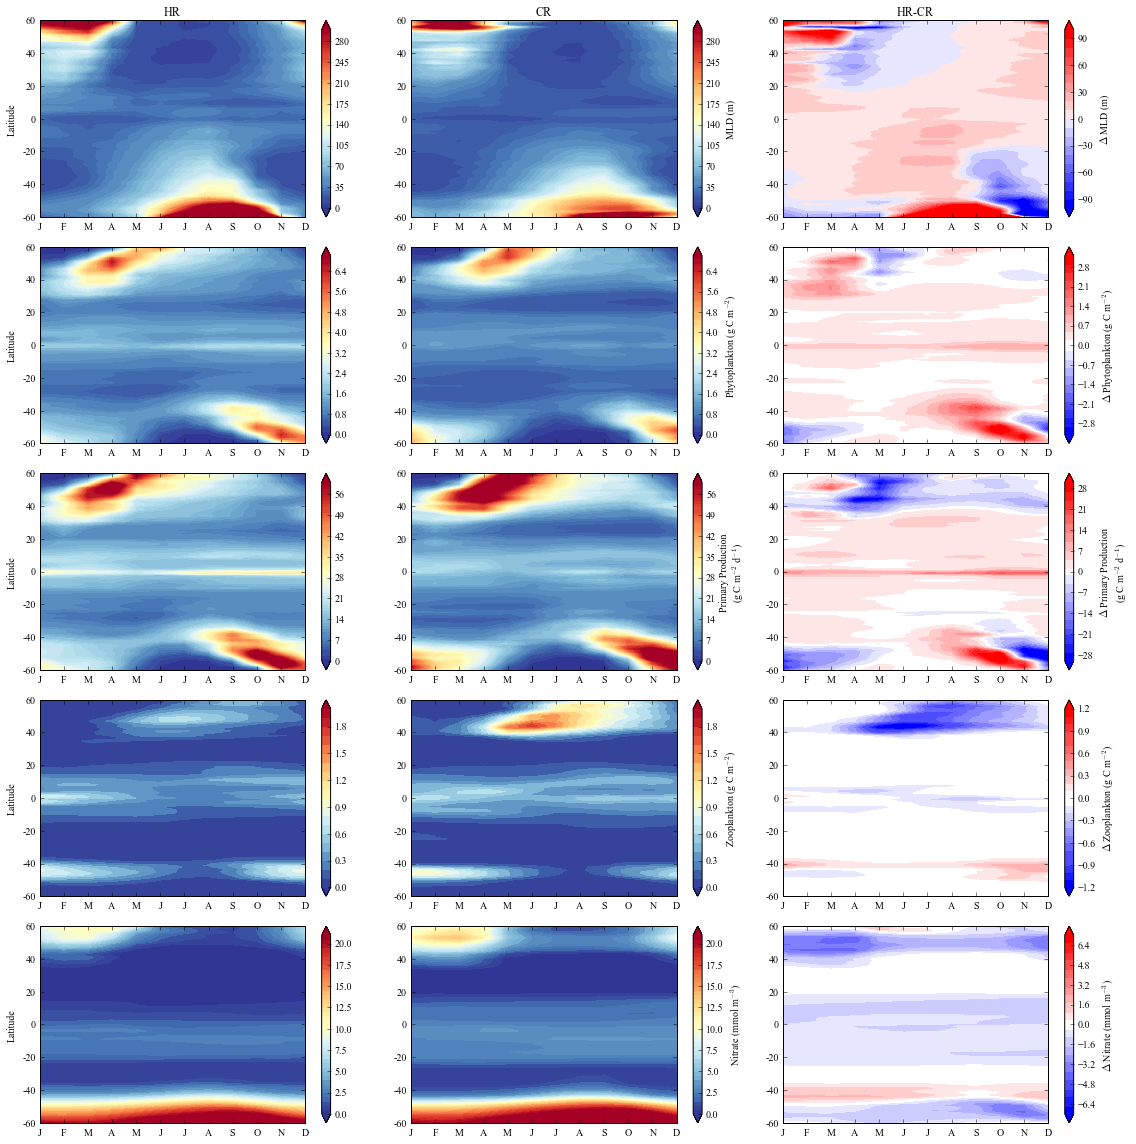

In [10]:
palette1 = plt.get_cmap('bwr', 21)
palette2 = plt.get_cmap('RdYlBu_r', 50)

months = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O','N', 'D']
lats = range(-60,70,20)

f1, axarr = plt.subplots(5,3, figsize=(16,16), dpi = 600)

## MLD ##
h1 = axarr[0,0].contourf((binnedhr[:,:,4]).transpose(1,0), levels = range(0,305, 5),cmap=palette2, extend = 'both')
#axarr[0,0].contour(binnedhr[:,:,4].transpose(1,0), levels = [50,100,200], colors='k', linestyles='solid')
cbar1 = plt.colorbar(h1, ax=axarr[0,0])
axarr[0,0].axis([ 0,11,20,140])
axarr[0,0].set_yticks(range(20,150,20))
axarr[0,0].set_yticklabels(lats)
axarr[0,0].set_xticks(range(0, 12, 1))
axarr[0,0].set_xticklabels(months)
axarr[0,0].set_title('HR')
axarr[0,0].set_ylabel('Latitude')

c1 = axarr[0,1].contourf((binnedcr[:,:,4]).transpose(1,0), levels = range(0, 305, 5),cmap=palette2, extend = 'both')
#axarr[0,1].contour((binnedcr[:,:,4]).transpose(1,0), levels = [50,100,200], colors='k', linestyles='solid')
cbar2 = plt.colorbar(c1, ax=axarr[0,1])
cbar2.set_label('MLD (m)', rotation=90)
axarr[0,1].axis([ 0,11,20,140])
axarr[0,1].set_yticks(range(20,150,20))
axarr[0,1].set_yticklabels(lats)
axarr[0,1].set_xticks(range(0, 12, 1))
axarr[0,1].set_xticklabels(months)
axarr[0,1].set_title('CR')

d1 = axarr[0,2].contourf(((binnedhr[:,:,4]-binnedcr[:,:,4])).transpose(1,0), levels = np.arange(-100,110, 10),cmap=palette1, extend = 'both')
#axarr[0,2].contour((binnedhr[:,:,4]-binnedcr[:,:,4]).transpose(1,0), levels = [0], colors='k', linestyles='solid')

cbar3 = plt.colorbar(d1, ax=axarr[0,2])
cbar3.set_label(r'$\Delta$ MLD (m)', rotation=90)
axarr[0,2].axis([ 0,11,20,140])
axarr[0,2].set_yticks(range(20,150,20))
axarr[0,2].set_yticklabels(lats)
axarr[0,2].set_xticks(range(0, 12, 1))
axarr[0,2].set_xticklabels(months)
axarr[0,2].set_title('HR-CR')

## Phyto ##
to_c = 106*12/1000
h2 = axarr[1,0].contourf((binnedhr[:,:,0]).transpose(1,0)*to_c, levels = np.arange(0,7.1,0.1),cmap=palette2, extend = 'both')
cbar4 = plt.colorbar(h2, ax=axarr[1,0])
axarr[1,0].axis([ 0,11,20,140])
axarr[1,0].set_yticks(range(20,150,20))
axarr[1,0].set_yticklabels(lats)
axarr[1,0].set_xticks(range(0, 12, 1))
axarr[1,0].set_xticklabels(months)
axarr[1,0].set_ylabel('Latitude')

c2 = axarr[1,1].contourf((binnedcr[:,:,0]).transpose(1,0)*to_c, levels = np.arange(0, 7.1, 0.1),cmap=palette2, extend = 'both')
cbar5 = plt.colorbar(c2, ax=axarr[1,1])
cbar5.set_label(r'Phytoplankton (g C m$^{-2}$)', rotation = 90)
axarr[1,1].axis([ 0,11,20,140])
axarr[1,1].set_yticks(range(20,150,20))
axarr[1,1].set_yticklabels(lats)
axarr[1,1].set_xticks(range(0, 12, 1))
axarr[1,1].set_xticklabels(months)

d2 = axarr[1,2].contourf(((binnedhr[:,:,0]-binnedcr[:,:,0])).transpose(1,0)*to_c, levels = np.arange(-3.2, 3.3,0.1),cmap=palette1, extend = 'both')
#axarr[1,2].contour((binnedhr[:,:,0]-binnedcr[:,:,0]).transpose(1,0), levels = [0], colors = 'k', linestyles = 'solid')

cbar6 = plt.colorbar(d2, ax=axarr[1,2])
cbar6.set_label(r'$\Delta$ Phytoplankton (g C m$^{-2}$)', rotation = 90)
axarr[1,2].axis([ 0,11,20,140])
axarr[1,2].set_yticks(range(20,150,20))
axarr[1,2].set_yticklabels(lats)
axarr[1,2].set_xticks(range(0, 12, 1))
axarr[1,2].set_xticklabels(months)

## PP ##
s_d = 60*60*24*106 # mmol C m^-2 day^-1
h3 = axarr[2,0].contourf((binnedhr[:,:,1]).transpose(1,0)*s_d, levels = np.arange(0,61,1),cmap=palette2, extend = 'both')
cbar7 = plt.colorbar(h3, ax=axarr[2,0])
axarr[2,0].axis([ 0,11,20,140])
axarr[2,0].set_yticks(range(20,150,20))
axarr[2,0].set_yticklabels(lats)
axarr[2,0].set_xticks(range(0, 12, 1))
axarr[2,0].set_xticklabels(months)
axarr[2,0].set_ylabel('Latitude')

c3 = axarr[2,1].contourf((binnedcr[:,:,1]).transpose(1,0)*s_d, levels = np.arange(0, 61,1),cmap=palette2, extend = 'both')
cbar8 = plt.colorbar(c3, ax=axarr[2,1])
cbar8.set_label(r'Primary Production' '\n' r'(g C m$^{-2}$ d$^{-1}$)', rotation =90)
axarr[2,1].axis([ 0,11,20,140])
axarr[2,1].set_yticks(range(20,150,20))
axarr[2,1].set_yticklabels(lats)
axarr[2,1].set_xticks(range(0, 12, 1))
axarr[2,1].set_xticklabels(months)

d3 = axarr[2,2].contourf(((binnedhr[:,:,1]-binnedcr[:,:,1])).transpose(1,0)*s_d, levels = np.arange(-30, 31,1),cmap=palette1, extend = 'both')
#axarr[2,2].contour((binnedhr[:,:,1]-binnedcr[:,:,1]).transpose(1,0), levels = [0], colors = 'k', linestyles='solid')

cbar9 = plt.colorbar(d3, ax=axarr[2,2])
cbar9.set_label(r'$\Delta$ Primary Production' '\n' r'(g C m$^{-2}$ d$^{-1}$)', rotation =90)
axarr[2,2].axis([ 0,11,20,140])
axarr[2,2].set_yticks(range(20,150,20))
axarr[2,2].set_yticklabels(lats)
axarr[2,2].set_xticks(range(0, 12, 1))
axarr[2,2].set_xticklabels(months)

## Z ##
h4 = axarr[3,0].contourf((binnedhr[:,:,2]).transpose(1,0)*to_c, levels = np.arange(0,2.1,0.1),cmap=palette2, extend = 'both')
cbar10 = plt.colorbar(h4, ax=axarr[3,0])
axarr[3,0].axis([ 0,11,20,140])
axarr[3,0].set_yticks(range(20,150,20))
axarr[3,0].set_yticklabels(lats)
axarr[3,0].set_xticks(range(0, 12, 1))
axarr[3,0].set_xticklabels(months)
axarr[3,0].set_ylabel('Latitude')

c4 = axarr[3,1].contourf((binnedcr[:,:,2]).transpose(1,0)*to_c, levels = np.arange(0,2.1,0.1),cmap=palette2, extend = 'both')
cbar11 = plt.colorbar(c4, ax=axarr[3,1])
cbar11.set_label(r'Zooplankton (g C m$^{-2}$)', rotation =90)
axarr[3,1].axis([ 0,11,20,140])
axarr[3,1].set_yticks(range(20,150,20))
axarr[3,1].set_yticklabels(lats)
axarr[3,1].set_xticks(range(0, 12, 1))
axarr[3,1].set_xticklabels(months)

d4 = axarr[3,2].contourf(((binnedhr[:,:,2]-binnedcr[:,:,2])).transpose(1,0)*to_c, levels = np.arange(-1.2, 1.3,0.1),cmap=palette1, extend = 'both')
#axarr[3,2].contour((binnedhr[:,:,2]-binnedcr[:,:,2]).transpose(1,0), levels = [0], colors = 'k', linestyles='solid')

cbar12 = plt.colorbar(d4, ax=axarr[3,2])
cbar12.set_label(r'$\Delta$ Zooplankton (g C m$^{-2}$)', rotation =90)
axarr[3,2].axis([ 0,11,20,140])
axarr[3,2].set_yticks(range(20,150,20))
axarr[3,2].set_yticklabels(lats)
axarr[3,2].set_xticks(range(0, 12, 1))
axarr[3,2].set_xticklabels(months)

## Nitrate ##
h5 = axarr[4,0].contourf((binnedhr[:,:,3]).transpose(1,0), levels = np.arange(0,21.5,0.5),cmap=palette2, extend = 'both')
cbar13 = plt.colorbar(h5, ax=axarr[4,0])
axarr[4,0].axis([ 0,11,20,140])
axarr[4,0].set_yticks(range(20,150,20))
axarr[4,0].set_yticklabels(lats)
axarr[4,0].set_xticks(range(0, 12, 1))
axarr[4,0].set_xticklabels(months)
axarr[4,0].set_ylabel('Latitude')

c5 = axarr[4,1].contourf((binnedcr[:,:,3]).transpose(1,0), levels = np.arange(0,21.5,0.5),cmap=palette2, extend = 'both')
cbar14 = plt.colorbar(c5, ax=axarr[4,1])
cbar14.set_label(r'Nitrate (mmol m$^{-3}$)', rotation =90)
axarr[4,1].axis([ 0,11,20,140])
axarr[4,1].set_yticks(range(20,150,20))
axarr[4,1].set_yticklabels(lats)
axarr[4,1].set_xticks(range(0, 12, 1))
axarr[4,1].set_xticklabels(months)

d5 = axarr[4,2].contourf(((binnedhr[:,:,3]-binnedcr[:,:,3])).transpose(1,0), levels = np.arange(-7.2, 7.4,0.2),cmap=palette1, extend = 'both')
#axarr[4,2].contour((binnedhr[:,:,3]-binnedcr[:,:,3]).transpose(1,0), levels = [0], colors = 'k', linestyles='solid')

cbar15 = plt.colorbar(d5, ax=axarr[4,2])
cbar15.set_label(r'$\Delta$ Nitrate (mmol m$^{-3}$)', rotation =90)
axarr[4,2].axis([ 0,11,20,140])
axarr[4,2].set_yticks(range(20,150,20))
axarr[4,2].set_yticklabels(lats)
axarr[4,2].set_xticks(range(0, 12, 1))
axarr[4,2].set_xticklabels(months)
    
plt.show()

f1.savefig('/Users/sclayton/Google Drive/work/comparison/review/figures/hovmoller.png', bbox_inches='tight', dpi=600)